In [1]:
import xarray as xr
import rioxarray,os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.colors as mpl_color
from glob import glob
import numpy as np


In [2]:
filename_= "mtgnwcsaf/S_NWC_CT_MTI1_TmetWeb-NR_20251218T103000Z_PLAX.nc"

In [3]:
norm = mpl_color.BoundaryNorm(np.linspace(0.5, 15.5, 16), 15)
norm = mpl_color.Normalize(vmin=1, vmax=15)

clr = [[0.0, 0.47, 0.0,0],[0.0, 0.0, 0.0,0],[0.98, 0.74, 0.98,0],[0.86, 0.62, 0.86,0],\
       [1.0, 0.39, 0.0,1],[1.0, 0.70, 0.0,1],   [0.94, 0.94, 0.0,1],[0.84, 0.84, 0.58,1],\
       [0.90, 0.90, 0.90,1],[0.78, 0.0, 0.78,1],[0.0, 0.31, 0.84,1],[0.0, 0.70, 0.90,1],\
       [0.0, 0.94, 0.94,1],[0.35, 0.78, 0.62,1],[0.78, 0.68, 0.98,1]]


In [4]:
plt.figure(figsize=(7.8,4.98),dpi=170)
my_cmap = ListedColormap(clr)
my_cmap.set_bad(alpha=0)

<Figure size 1326x846.6 with 0 Axes>

In [5]:
# Dosyayı aç
ds = xr.open_dataset(filename_, engine="netcdf4")

# İlgili veri değişkeni
da = ds["ct"]

# Lat/Lon değişkenleri
lat = ds["lat"]
lon = ds["lon"]

In [6]:
# İstediğin kutu: 33–45N, 23–48E
mask = (lat >= 33) & (lat <= 48) & (lon >= 23) & (lon <= 45)

# Maskeleme
da_clip = da.where(mask, drop=True)
lat_clip = lat.where(mask, drop=True)
lon_clip = lon.where(mask, drop=True)

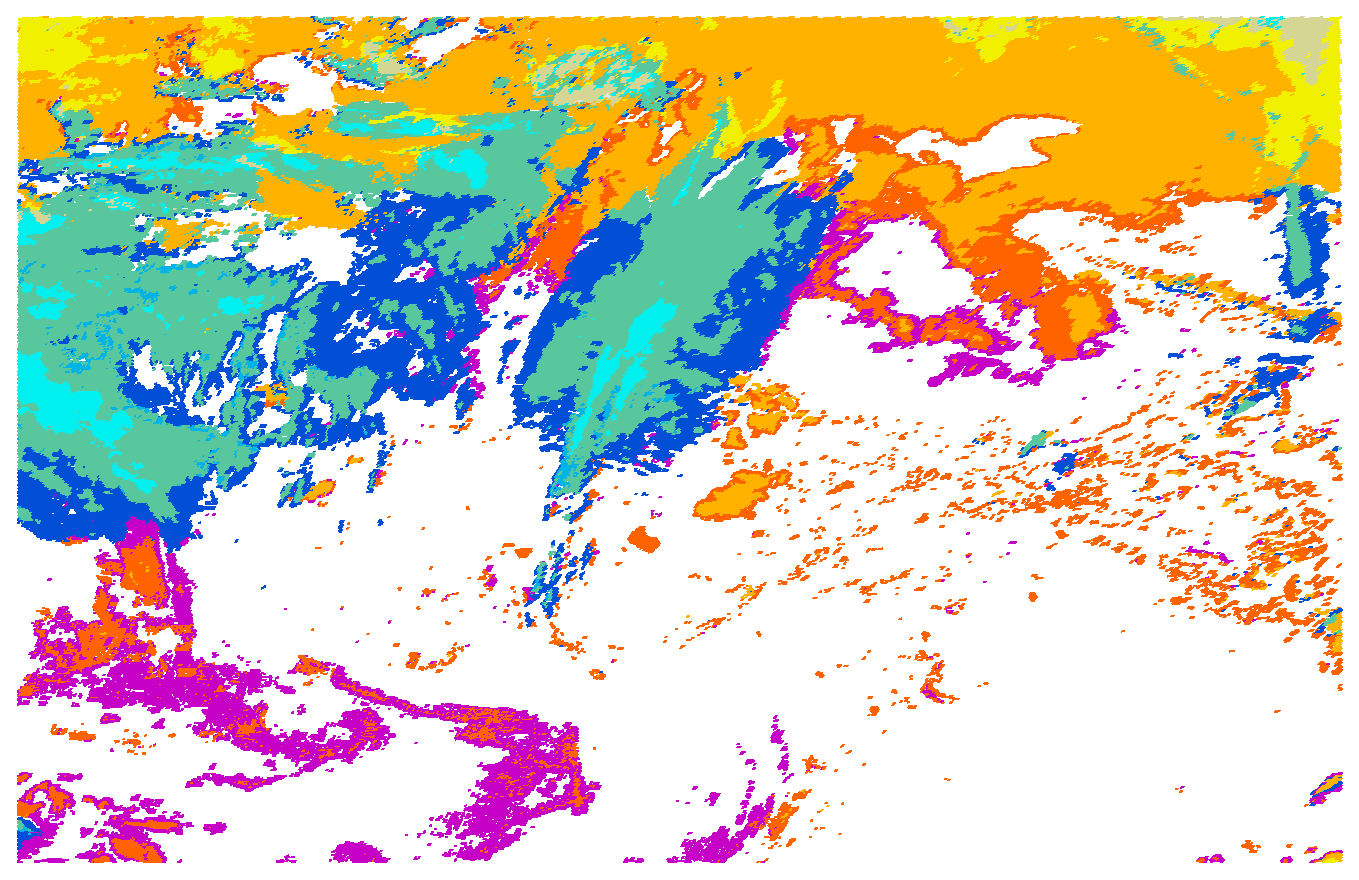

In [7]:
da_clip.rio.write_crs("EPSG:4326")  # lat/lon olduğu için


plt.figure(figsize=(7.8,4.98),dpi=170)
#plt.figure(figsize=(8,6))
#plt.pcolormesh(lon_clip, lat_clip, da_clip.squeeze())
plt.pcolor(lon_clip, lat_clip, da_clip.squeeze(),norm=norm,cmap=my_cmap)
plt.axis("off")          # hem x hem y eksenini kapatır
plt.gca().set_axis_off() # eksen çizgilerini de kaldırır
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # boşlukları sıfırla
plt.savefig("ct.png",bbox_inches='tight',pad_inches = 0.,transparent=True)
